#Configuraciones e Instalación de librerías y paquetes
 Se comienza instalando entorno de ejecución, para esto  se instala lo siguiente

In [ ]:
!pip install -U matplotlib scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#Descargar el dataset directamente desde kagle.
Se debe subir un archivo de autentificacion de kagle llamado kagle.json a traves del metodo files de colab

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alexparad","key":"e1801c09b35f22573e79cc2fbe498509"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d gyejr95/league-of-legends-challenger-ranked-games2020 
! unzip /content/league-of-legends-challenger-ranked-games2020.zip 

 39% 5.00M/12.7M [00:00<00:00, 41.1MB/s]
100% 12.7M/12.7M [00:00<00:00, 91.6MB/s]
Archive:  /content/league-of-legends-challenger-ranked-games2020.zip
  inflating: Challenger_Ranked_Games.csv  
  inflating: GrandMaster_Ranked_Games.csv  
  inflating: Master_Ranked_Games.csv  


# Lectura del dataset.
Para esta sección, se usa la librería pandas y su función read_csv() para obtener los datos del dataset y guardarlos en una variable.


In [ ]:
data = pd.read_csv("Master_Ranked_Games.csv")
data.describe()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
count,1.071250e+05,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,...,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000
mean,4.159074e+09,1432.977914,0.495132,0.507025,0.513410,0.236229,0.408047,0.387715,1.359356,0.297018,...,39.807365,68789.821620,47875.980285,501.132966,64.695561,12.939112,125.359683,5.688831,24547.786763,36884.671888
std,1.029108e+08,436.506952,0.499979,0.499953,0.499822,0.424766,0.491474,0.487231,1.256974,0.535069,...,28.805782,37648.964189,16455.077811,180.010409,15.166821,3.033364,66.746287,3.640699,15510.255865,27034.549770
min,3.163679e+09,190.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.129344e+09,1121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19.000000,40494.000000,36127.000000,382.000000,55.000000,11.000000,84.000000,3.000000,13297.000000,12583.000000
50%,4.189629e+09,1420.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,35.000000,63885.000000,47955.000000,517.000000,66.000000,13.200000,128.000000,5.000000,21455.000000,32486.000000
75%,4.222893e+09,1735.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,...,53.000000,90554.000000,59133.000000,627.000000,75.000000,15.000000,171.000000,8.000000,32367.000000,57346.000000
max,4.257322e+09,3758.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,4.000000,...,225.000000,341957.000000,141692.000000,1338.000000,145.000000,29.000000,488.000000,29.000000,188817.000000,191193.000000


In [ ]:
data.head()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4227123625,1429,0,1,1,0,0,0,0,0,...,45,53831,41991,609,64,12.8,127,4,12916,26338
1,4219545724,1313,0,0,1,0,0,0,0,0,...,43,52924,39672,510,63,12.6,133,4,12252,29828
2,4219463634,1660,1,0,0,1,1,1,1,1,...,22,61745,46516,630,65,13.0,153,2,17005,37066
3,4205778093,984,1,1,1,0,1,0,2,0,...,5,25007,21444,304,41,8.2,51,1,10499,3085
4,4201063474,1437,0,1,1,0,1,0,2,0,...,39,71794,45798,565,68,13.6,150,7,47523,47150


# Distribucion Testing, Entrenamiento y grafica de referencia.
Para esta seccion se muestra la proporcion para trabajar con los datos, en la cual se observa una proporcion del 70% para entrenamiento y un 30% para testeo.

In [ ]:
print(data['gameId'].size)#data.size = 107125;
dataTraining = data.sample(n=74987, replace=False)#data.size x 0,7 = 74987,5
dataTest = data.drop(dataTraining.index)# 107125 - 74987 = 32138
print(dataTraining['gameId'].size)
print(dataTest['gameId'].size)

107125
74987
32138


La tarea consiste en dado determinados puntos, cuyas coordenadas seran "*gameDuraton*" y "*redKillingSpree*". Lograr predecir a que grupo de "blueDragonKills" pertenecen los puntos. Para tener una referencia en el siguiente grafico muestra los puntos de prueba "*dataTest*" con su respectivo grupo. La idea es que los algoritmos logren algo semejante a partir de predicciones.

8


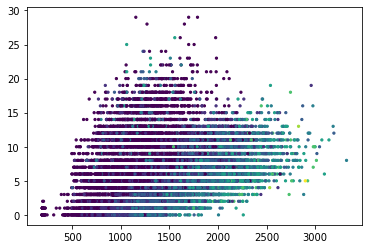

In [ ]:
labelsReference = dataTest['blueDragonKills']
print(np.unique(labelsReference).size)
plt.scatter(dataTest['gameDuraton'], dataTest["redKillingSpree"], c=labelsReference, s=5 )

# Algoritmos supervisados. KNN y Regresion Lineal

Los algoritmos supervisados consiste en entrenar los algoritmos entregando los puntos con su etiqueta. La etiqueta es el parametro que se desea predecir, atributo objetivo.


---





Para realizar el aprendizaje se necesita armar los inputs de entrenamiento que consistene en pasar una coordenadas X o Y ademas del parametro objetivo.

Ya con los datos de entrenamiento de estos se sacara las coordenadas de entrenamiento y test para luego normalizarlos y ser utilizados por los siguientes algoritmos.

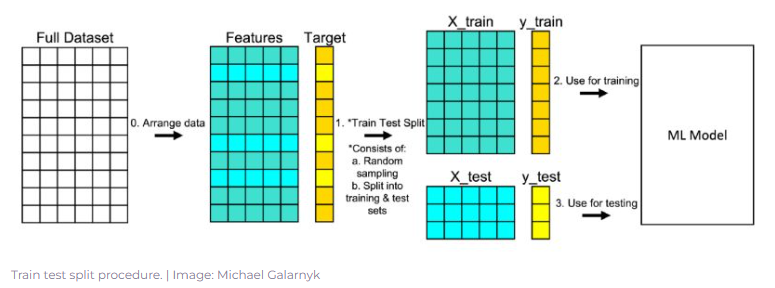

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

inputTrainingX = np.array(dataTraining[["gameDuraton", "blueDragonKills"]])
inputTrainingY = np.array(dataTraining[['redKillingSpree', "blueDragonKills"]])

X_train, X_test, Y_train, Y_test = train_test_split(inputTrainingX, inputTrainingY, random_state=0)
X_testTemp = X_test
Y_testTemp= Y_test

#normaliza los datos https://interactivechaos.com/es/manual/tutorial-de-machine-learning/minmaxscaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#------------------------------------------
#Regresor pq trabajamos con cosas continuas, con clasifier es lo mismo solo hay que cambiar el parametro


# *K-Nearest Neighbors*

KNN es un algoritmo supervisado, el cual requiere de un entrenamiento con etiquetas para poder predecir. Este algoritmo se basa en generar grupo a partir de la cercania que hay entre puntos del entrenamiento que ya tienen etiqueta. K es el parametro que indica el numero de vecinos que se consulta para determinar el grupo del dato actual.

Para este caso se determino arbitrariamente la cantidad de vecinos como 7 (K = n_neighbors).

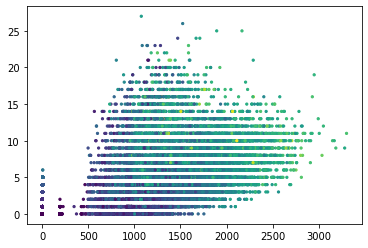

In [ ]:
neigh2 = KNeighborsRegressor(n_neighbors=7)
neigh2.fit(X_train, Y_train)

res = neigh2.predict(X_test)

plt.scatter(X_testTemp, Y_testTemp,c=res, s=5)
plt.show()

# ***Algoritmo de Regresion Lineal***

El algoritmo de regresion lineal es algoritmo supervisado, sin embargo es de prediccion. Un algoritmo de prediccion consiste en la naturaleza de la etiqueta, en donde en clasificacion es discreta, en prediccion esta es continua.

El algoritmo consiste en un metodo iterativo de reducir una funcion de costo que en el caso univariable es una recta. Para reducir la funcion se utiliza el descenso del gradiente e ir ajustando los parametros.

DATOS DEL MODELO REGRESIÓN LINEAL

Valor de las pendientes o coeficientes "m":
[[ 1.75556040e+01 -8.75753493e+00]
 [-4.01963803e-15  7.00000000e+00]]
Valor de la intersección o coeficiente "b":
[1.29192715e+00 2.95097280e-13]
Precisión del modelo:
0.6408534022905377


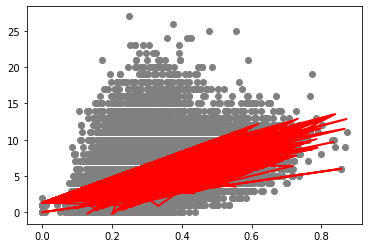

In [ ]:
#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()

#Entreno el modelo
lr_multiple.fit(X_train, Y_train)

#Realizo una predicción
Y_pred_multiple = lr_multiple.predict(X_test)

print('DATOS DEL MODELO REGRESIÓN LINEAL')
print()

print('Valor de las pendientes o coeficientes "m":')
print(lr_multiple.coef_)

print('Valor de la intersección o coeficiente "b":')
print(lr_multiple.intercept_)

print('Precisión del modelo:')
print(lr_multiple.score(X_train, Y_train))

plt.scatter(X_test, Y_test,  color='gray')
plt.plot(X_test, Y_pred_multiple, color='red', linewidth=2)

plt.show()

# Metricas de ERROR
Para este apartado se utilizan las siguientes metricas
-Error cuadratico medio
-Error absoluto medio
-Precision del modelo

Dandonos los siguientes resultados

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("Error cuadrático medio: ", mean_squared_error(Y_testTemp, res))
print("Error absoluto medio: ", mean_absolute_error(Y_testTemp, res))
print("Precision del modelo", neigh2.score(X_train,Y_train))


Error cuadrático medio:  4.876900576200975
Error absoluto medio:  1.1489876475474243
Precision del modelo 0.6892417767076091


Por una parte se observa que el valor obtenido de la precision de modelo es 0.6, lo que nos indica que el modelo usado es  medianamente fiable ya que esta sobre el 50% de precision, esto significa que tendremos un 60% de predicciones correctas.
Por otra parte obtenemos tanto el error absoluto medio y el cuadratico medio, el primero indica el promedio entre los errores absolutos con los errores obtenidos en el modelo, mientras mas alto sea este valor, menos fiable sera el modelo. Por otra parte el error cuadratico medio significa medir el promedio de los errores al cuadrado, influenciando tambien que a medida que sea mas alto este valor, menor fiable sera el modelo elegido


# Metrica de Error y comparacion con KNN

Para el modelo regresion lineal, se utiliza la metrica de error perteneciente a precision del modelo, esto nos da el resultado de 0.639 como se vio en el apartado anterior lo que significa que tendremos un 64% aproximadamente de predicciones correctas. Si esto lo comparamos con la precision del modelo KNN, este ultimo posee un mejor porcentaje de precision, esto se debe a  diversos parametros como por ejemplos a la falta de más datos a considerar, los datos utilizados no son optimos para el algoritmo o falta de contexto en los datos utilizados.Sin embargo este esta metrica no significa que el modelo KNN sea el mejor, debido a que se deben tomar otros parametros a tener en cuenta ya que puede presentar problemas, como son los casos de la prediccion que significa cuan lejos estan los puntos con el punto a predecir, en este parametro ocurirria problemas en espacios de un tamaño considerablemente alto, otro parametro es la extrapolacion debido a que KNN no puede extrapolar datos ya que estos son inalterables, luego esta la velocidad ya que KNN es muy costoso y lento para una cantidad considerable de datos, etc. Por estas razones es importante elegir bien los algoritmos para un conjunto determinado de datos, analizar su contexto y determinar la cantidad de datos con que se trabajará.

# Algoritmos no supervisados, GaussianMixture y DBSCAN


GMM es un algoritmo de clustering, que asume que los datos se generar a partir de mezclas de distribuciones Gaussianas con parametros desconocidos. Es un algoritmo no supervisado, lo que implica en que no requiere la etiqueta en su entrenamiento. GMM forma los grupo encontrando la distribucion Gaussiana que mas se asociado a los datos de entrada.

Sin embargo, GMM en estricto rigo es un estimador de densidad. Dado que tal como se menciono anteriormente, GMM busca representar una distribucion que se ajusta a los datos de entrada.






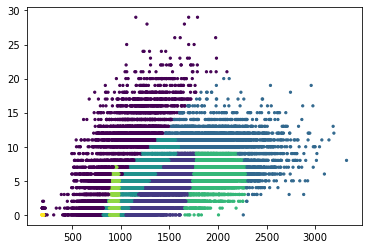

In [ ]:
gmm2 = GaussianMixture(n_components=7).fit(dataTraining[["gameDuraton", "redKillingSpree"]]) #Entrenar con el 70%  de la data
labels = gmm2.predict(dataTest[["gameDuraton", "redKillingSpree"]])# Sacar los labels de prediccion de dataTest.
plt.scatter(dataTest["gameDuraton"], dataTest["redKillingSpree"], c=labels, s=5 );#Plotear el 30 % restante, pero con los labels de entrenamiento

DBSCAN es un algoritmo de clustering supervisado, que dado un entrenamiento sin etiqueta busca identificar a que grupo pertenece nuevos puntos, pero al igual que GMM es un algoritmo de densidad pero con la particularidad que logra determinar outliers en el grupo de datos, ignorandolos.

Un outliers son datos cuyas caracteristicas son extremademente diferentes a la mayoria de puntos, lo que implica un gran problemas para los algoritmos ya que buscan lograr caracterizar todos los puntos, y tienen que cambiar los criterios de grupo de millones de datos, solamente por un dato (outliers) para abordar a todos los datos.

Para poder descartar a los outliers DBSCAN recibe como parametro la distancia maxima que debe haber entre 2 puntos para considerarse vecinos, ademas del minimo de vecinos que debe haber para que se consideren un grupo.

5


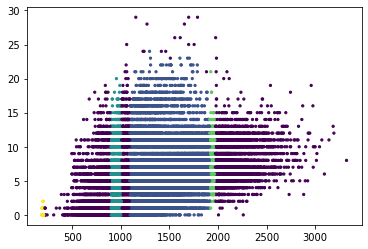

In [ ]:
labelsDBSCAN = DBSCAN(eps = 11, min_samples = 350).fit_predict(dataTest[["gameDuraton", "redKillingSpree"]])
print(np.unique(labelsDBSCAN).size)#5
plt.scatter(dataTest["gameDuraton"], dataTest["redKillingSpree"], c=labelsDBSCAN, s=5 )

Con respecto a los resultados, se puede observar que en el algoritmo DBSCAN realiza una separacion de grupos vertical, en donde no necesariamente deben estar los grupos en cercania para poder catalogarse como uno. En contraparte GMM puede realizar la estimacion de grupos a partir de parametros desconocidos separandolos por una linea continua quedando los grupos claramente identificables y asemejandose bastante al modelo de referencia.